Facebook Marketplace Dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

In [ ]:
df=pd.read_csv("Facebook_Marketplace_data.csv")


1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

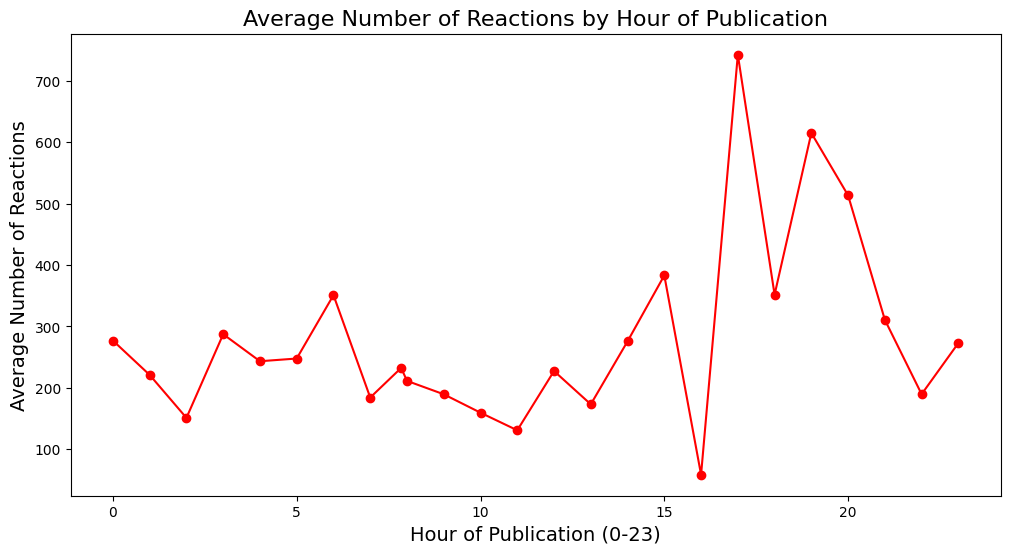

In [ ]:
# Remove empty columns
df_cleaned = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])

# Convert 'status_published' to datetime
df_cleaned['status_published'] = pd.to_datetime(df_cleaned['status_published'], errors='coerce')

# Extract hour from the 'status_published' column
df_cleaned['publish_hour'] = df_cleaned['status_published'].dt.hour
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df_cleaned[['publish_hour']])
df_cleaned['publish_hour']=imputer.transform(df_cleaned[['publish_hour']])

# Group by the hour of publication and calculate the average number of reactions
hourly_reactions = df_cleaned.groupby('publish_hour')['num_reactions'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_reactions['publish_hour'], hourly_reactions['num_reactions'], marker='o', linestyle='-', color='red')
plt.title('Average Number of Reactions by Hour of Publication', fontsize=16)
plt.xlabel('Hour of Publication (0-23)', fontsize=14)
plt.ylabel('Average Number of Reactions', fontsize=14)
plt.show()


2)2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

               num_comments
num_reactions              
30.000000               197
31.763568                 0
35.000000               132
39.000000               237
56.000000              1226
...                     ...
2399.000000            2458
2621.000000             122
2635.000000             308
2639.000000            1625
3730.000000             156

[663 rows x 1 columns]


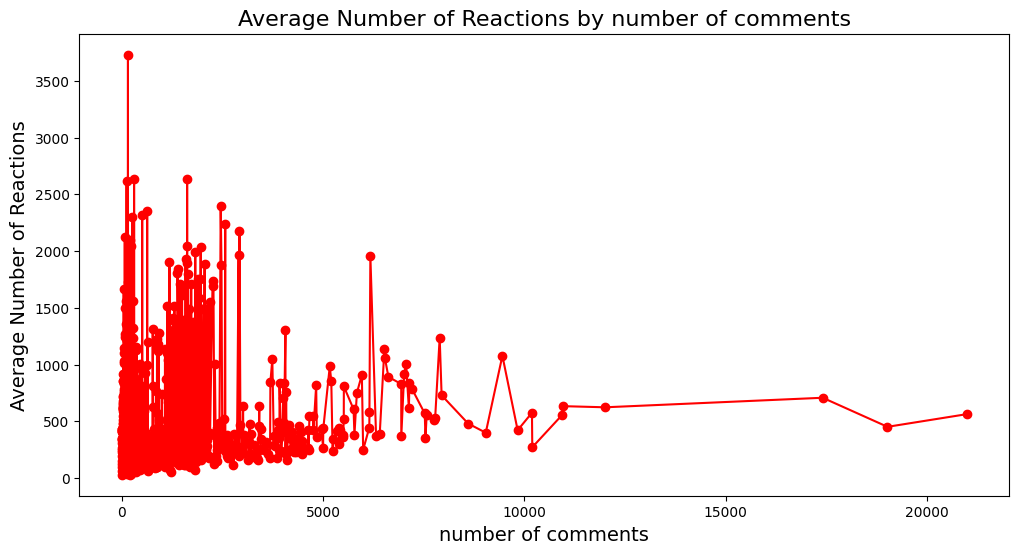

In [ ]:
comments = df_cleaned.groupby('num_comments')['num_reactions'].mean().reset_index()
max=comments.groupby('num_reactions').max()

print(max)



# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(comments['num_comments'], comments['num_reactions'], marker='o', linestyle='-', color='red')
plt.title('Average Number of Reactions by number of comments', fontsize=16)
plt.xlabel('number of comments', fontsize=14)
plt.ylabel('Average Number of Reactions', fontsize=14)
plt.show()

In [ ]:
print("therefore we get that maximum number of reactions occured when comments were 156")
print("therefore we get that minimum number of reactions occured when comments were 197 closely followed by 0")

therefore we get that maximum number of reactions occured when comments were 156
therefore we get that minimum number of reactions occured when comments were 197 closely followed by 0


               num_shares
num_reactions            
73.0                  134
77.0                   59
83.0                  330
94.0                   91
103.0                 356
...                   ...
2173.0                818
2237.0                815
2399.0               1430
2621.0                 98
2639.0                675

[435 rows x 1 columns]
     num_comments  num_reactions
0               0      31.763568
1               1      63.617021
2               2      95.527473
3               3     128.129450
4               4     148.369478
..            ...            ...
988         10960     634.000000
989         12003     624.000000
990         17404     708.000000
991         19013     452.000000
992         20990     564.000000

[993 rows x 2 columns]


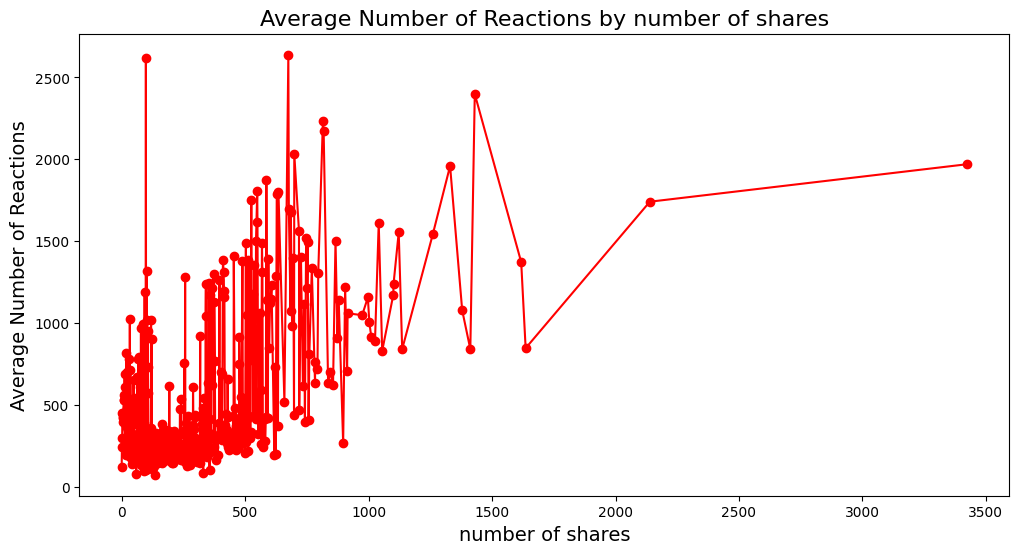

In [ ]:
shares = df_cleaned.groupby('num_shares')['num_reactions'].mean().reset_index()
max=shares.groupby('num_reactions').max()

print(max)

print(comments)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(shares['num_shares'], shares['num_reactions'], marker='o', linestyle='-', color='red')
plt.title('Average Number of Reactions by number of shares', fontsize=16)
plt.xlabel('number of shares', fontsize=14)
plt.ylabel('Average Number of Reactions', fontsize=14)
plt.show()

In [ ]:
print("therefore we get that maximum number of reactions occured when shares were 675")
print("therefore we get that minimum number of reactions occured when shares were 134")

therefore we get that maximum number of reactions occured when shares were 675
therefore we get that minimum number of reactions occured when shares were 134


In [ ]:
# Calculate the Pearson correlation matrix for the relevant columns
correlation_matrix = df_cleaned[['num_reactions', 'num_comments', 'num_shares','publish_hour']].corr()

# Display the correlation matrix
correlation_matrix

num_reactions  num_comments  num_shares  publish_hour
num_reactions       1.000000      0.150843    0.250723      0.012192
num_comments        0.150843      1.000000    0.640637     -0.011934
num_shares          0.250723      0.640637    1.000000     -0.044480
publish_hour        0.012192     -0.011934   -0.044480      1.000000

3)3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset

In [ ]:
print(df_cleaned)
print(df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4']))

      status_id status_type    status_published  num_reactions  num_comments  \
0             1       video 2018-04-22 06:00:00            529           512   
1             2       photo 2018-04-21 22:45:00            150             0   
2             3       video 2018-04-21 06:17:00            227           236   
3             4       photo 2018-04-21 02:29:00            111             0   
4             5       photo 2018-04-18 03:22:00            213             0   
...         ...         ...                 ...            ...           ...   
7045       7046       photo 2016-09-24 02:58:00             89             0   
7046       7047       photo 2016-09-23 11:19:00             16             0   
7047       7048       photo 2016-09-21 23:03:00              2             0   
7048       7049       photo 2016-09-20 00:43:00            351            12   
7049       7050       photo                 NaT             17             0   

      num_shares  num_likes  num_loves 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
# Keep df_cleaned as a DataFrame
#df_cleaned.head()  # This will work as expected
#hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
# Assign the transformed data to a new variable
df_cleaned_encoded = ct.fit_transform(df_cleaned)
# Convert the encoded data back into a DataFrame if needed:
df_cleaned_encoded = pd.DataFrame(df_cleaned_encoded)
df_cleaned_encoded.head()  # Now this will also work
df_cleaned_encoded.head()



0    1    2    3  4                   5    6    7    8    9   10 11 12 13  \
0  0.0  0.0  0.0  1.0  1 2018-04-22 06:00:00  529  512  262  432  92  3  1  1   
1  0.0  1.0  0.0  0.0  2 2018-04-21 22:45:00  150    0    0  150   0  0  0  0   
2  0.0  0.0  0.0  1.0  3 2018-04-21 06:17:00  227  236   57  204  21  1  1  0   
3  0.0  1.0  0.0  0.0  4 2018-04-21 02:29:00  111    0    0  111   0  0  0  0   
4  0.0  1.0  0.0  0.0  5 2018-04-18 03:22:00  213    0    0  204   9  0  0  0   

  14    15  
0  0   6.0  
1  0  22.0  
2  0   6.0  
3  0   2.0  
4  0   3.0

3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.
4.	Use the elbow method to find the optimum number of clusters


In [ ]:
#finding optimal wcss
cluster=df_cleaned_encoded.drop(columns=[5])
print(cluster)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
print(wcss)

       0    1    2    3     4    6    7    8    9   10 11 12 13 14       15
0     0.0  0.0  0.0  1.0     1  529  512  262  432  92  3  1  1  0      6.0
1     0.0  1.0  0.0  0.0     2  150    0    0  150   0  0  0  0  0     22.0
2     0.0  0.0  0.0  1.0     3  227  236   57  204  21  1  1  0  0      6.0
3     0.0  1.0  0.0  0.0     4  111    0    0  111   0  0  0  0  0      2.0
4     0.0  1.0  0.0  0.0     5  213    0    0  204   9  0  0  0  0      3.0
...   ...  ...  ...  ...   ...  ...  ...  ...  ...  .. .. .. .. ..      ...
7045  0.0  1.0  0.0  0.0  7046   89    0    0   89   0  0  0  0  0      2.0
7046  0.0  1.0  0.0  0.0  7047   16    0    0   14   1  0  1  0  0     11.0
7047  0.0  1.0  0.0  0.0  7048    2    0    0    1   1  0  0  0  0     23.0
7048  0.0  1.0  0.0  0.0  7049  351   12   22  349   2  0  0  0  0      0.0
7049  0.0  1.0  0.0  0.0  7050   17    0    0   17   0  0  0  0  0  7.84136

[7050 rows x 15 columns]
[37846108416.593925, 15726412360.845612, 12300583689.448181, 8

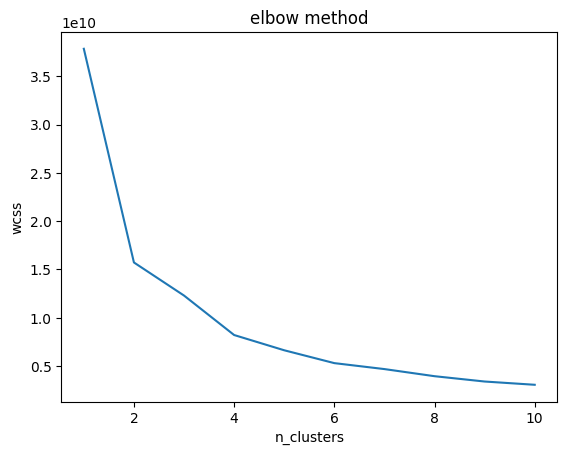

In [ ]:
#creating plot
plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("n_clusters")
plt.ylabel("wcss")
plt.show()
#from graph we get elbow at arnd 4 cluster(k=4)

5.	What is the count of different types of posts in the dataset?

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(cluster)   #fits data into clusters AND predicts and assigns these clusters as LABELS to y_kmeans




5.	What is the count of different types of posts in the dataset?

In [ ]:
counts=df_cleaned['status_type'].value_counts()
print(counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

In [ ]:
com_avg=df_cleaned['num_comments'].groupby(df_cleaned['status_type']).mean()
print("average comments:\n",com_avg)
react_avg=df_cleaned['num_reactions'].groupby(df_cleaned['status_type']).mean()
print("average reactions:\n",react_avg)
share_avg=df_cleaned['num_shares'].groupby(df_cleaned['status_type']).mean()
print("average shares:\n",share_avg)


average comments:
 status_type
link        5.698413
photo      15.993470
status     36.238356
video     642.478149
Name: num_comments, dtype: float64
average reactions:
 status_type
link      370.142857
photo     181.290345
status    438.783562
video     283.409597
Name: num_reactions, dtype: float64
average shares:
 status_type
link        4.396825
photo       2.553871
status      2.558904
video     115.679949
Name: num_shares, dtype: float64
